# Using multiple blocks

Here we are going to use 2 different blocks in our animation.

First we need some imports:

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp

We are going to plot a pcolormesh and a line on 2 different axes.

Let's use: $z = \sin(x^2+y^2-t)$ for the pcolormesh, and a cross-section of $y=0$: $z = \sin(x^2-t)$ for the line.

First, we generate the data.

In [2]:
x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
t = np.linspace(0, 2*np.pi, 30)

X, Y, T = np.meshgrid(x, y, t)

pcolormesh_data = np.sin(X*X+Y*Y-T)
line_data       = pcolormesh_data[20,:,:] # the slice where y=0

We need to be careful here. Our time axis is the last axis of our data, but animatplot assumes it is the first axis by default. Fortunately, we can use the ```t_axis``` argument.

We use the ```ax``` argument to attached the data to a specific subplot.

<IPython.core.display.Javascript object>


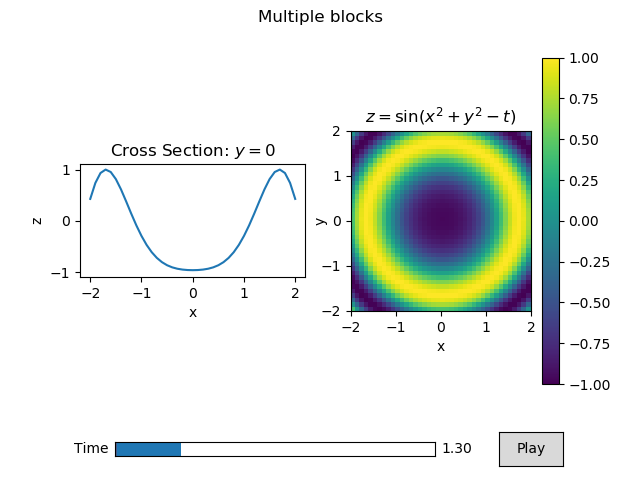

In [3]:
# standard matplotlib stuff
# create the different plotting axes
fig, (ax1, ax2) = plt.subplots(1, 2)

for ax in [ax1, ax2]:
    ax.set_aspect('equal')
    ax.set_xlabel('x')

ax2.set_ylabel('y', labelpad=-5)
ax1.set_ylabel('z')
ax1.set_ylim([-1.1,1.1])

fig.suptitle('Multiple blocks')
ax1.set_title('Cross Section: $y=0$')
ax2.set_title(r'$z=\sin(x^2+y^2-t)$')

# animatplot stuff
# now we make our blocks
line_block       = amp.blocks.Line(X[0,:,:], line_data,
                                   ax=ax1, t_axis=1)
pcolormesh_block = amp.blocks.Pcolormesh(X[:,:,0], Y[:,:,0], pcolormesh_data,
                                         ax=ax2, t_axis=2, vmin=-1, vmax=1)
plt.colorbar(pcolormesh_block.quad)
timeline = amp.Timeline(t, fps=10)

# now to contruct the animation
anim = amp.Animation([pcolormesh_block, line_block], timeline)
anim.controls()

anim.save_gif('images/multiblock')
plt.show()

There is a lot going on here so lets break it down.

Firstly, the ```standard matplotlib stuff``` is creating, and labeling all of our axes for our subplot. This is exactly how one might do a static, non-animated plot.

When we make the Line block, we pass in the data for our lines as 2D arrays (```X[0,:,:]``` and ```line_data```). We attached that line to the first matplotlib axes ```ax=ax1```. We also specifify that the time axis is the last axis of the data ```t_axis=1```.

When we make the Pcolormesh block, we pass in the x, y data as 2D arrays (```X[:,:,0]``` and ```Y[:,:,0]```), and the z data as a 3D array. We attached the pcolormesh to the second matplotlib axes ```ax=ax2```. We also specifify that the time axis is the last axis of the data ```t_axis=2```.

Additional, we told the Pcolormesh blocks what the minimum and maximum values will be (```vmin=-1``` and ```vmax=1```), so that the colorscale will be proper. The keywords ```vmin```, and ```vmax``` get passed to the underlaying called to matplotlib's pcolormesh.

```plt.colorbar``` does not recognize the Pcolormesh block as a mappable, so we pass in a mappable from the block to get the colorbar to work. In the future, animatplot may have a wrapper around this.

The rest simply brings all of the blocks, and the timeline together into an animation.